# Анализ продаж интернет-магазина "Стримчик"

В нашем распоряжении данные по продажам до 2016 года. Необходимо проанализировать их и проверить несколько гипотез, которые помогут выявить критерии потенциально популярных продуктов и спланировать рекламную кампанию на 2017 год.

В наборе данных используется аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

1. Подготовка данных для анализа:
- Загрузка данных.
- Обнаружение и устранение недочетов и аномалий в данных.
- Обработка дубликатов и приведение данных к необходимым типам.

2. Исследовательский анализ данных:
- Выявление закономерностей, выбросов и трендов в продажах.
- Построение и анализ графиков для визуализации распределения данных.
- Анализ пользовательских предпочтений по регионам:

3. Составление портретов пользователей для каждого региона на основе анализа данных.
- Определение влияния рейтинга ESRB на продажи в разных регионах.
- Оценка важности различных параметров для пользователей в каждом регионе.

4. Формулирование и проверка гипотез:
- Формулирование нескольких гипотез о влиянии жанров на продажи в различных регионах.
- Проведение статистических тестов для проверки гипотез на основе анализа данных.

5. Общий вывод по проекту, включая выявленные закономерности и рекомендации для улучшения стратегии продаж.

## Загрузка данных

**Импортируем библиотеку Pandas. Считаем данные из csv-файла в датафреймы и сохраним в переменные. Выведем несколько первых строк датафрейма и изучим общую информацию. В качестве разделителя используем `,`**

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/games.csv', sep=',')

**Изучим общую информацию о полученном датафрейме `data`.**

In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Выведем первые строки датафрейма `data`.**

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Отсутствие пропусков в данных о продажах, а также в столбце с названиями платформ игр, обеспечит нас полной информацией для проведения корректного исследования.

## Предобработка данных

**Перед началом предобработки данных таблицы, следует скорректировать метаданные, а именно привести названия столбцов к нижнему регистру для повышения читаемости.**

In [4]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Также проверим датафрейм на наличие явных дубликатов.**

In [5]:
data.duplicated().sum()

0

**Выполним проверку неявных дубликатов в столбцах `name`, `platform`, `year_of_release`.**

In [6]:
print(data['name'].value_counts())
print(data['platform'].unique())
print(data['year_of_release'].unique())

Need for Speed: Most Wanted                                                     12
Ratatouille                                                                      9
FIFA 14                                                                          9
Madden NFL 07                                                                    9
LEGO Marvel Super Heroes                                                         9
                                                                                ..
Fish Tycoon                                                                      1
Derby Stallion 96                                                                1
Crayon Shin-Chan: Densetsu o Yobu Omake no To Shukkugaan!                        1
Hisshou Pachinko*Pachi-Slot Kouryaku Series Vol. 9: CR Fever Captain Harlock     1
River King: Mystic Valley (US sales)                                             1
Name: name, Length: 11559, dtype: int64
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES

In [7]:
data[data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [8]:
#Код ревьюера
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


**В столбце `name` присутствуют 2 пропуска. Давайте взглянем на эти строки.**

In [9]:
empty_names = data[data['name'].isnull()]
empty_names

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Некоторые из этих проектов явно устарели и лишены названия. Они не окажут никакого влияния на результаты анализа. Мы можем без опасений удалить их из набора данных.

In [10]:
data = data.dropna(subset=['name'])
data['name'].isna().sum()

0

**Обратим внимание, что в столбце `year_of_release` пропущенные значения составляют менее 1% от общего объема данных. Нам не требуются для анализа игры, у которых отсутствует дата релиза. Поэтому их можно безопасно удалить из выборки.**

In [11]:
data = data.dropna(subset=['year_of_release'])
data = data.reset_index()
data['year_of_release'] = data['year_of_release'].astype('int64')
data['year_of_release'].isna().sum()

0

**Заполним пропуски в столбцах `critic_score`, `user_score` и `rating`. Скорее всего, эти пропуски не являются технической ошибкой, а связаны с тем, что данные игры не привлекли внимание критиков, а следовательно, не всегда получали оценки на сайтах, где игроки могли бы им присвоить рейтинг.**

**Проектов без оценки слишком много, чтобы удалить их или исключить из анализа, поэтому заполним пропущенные чиловые значения медианой, а пропущенные данные стоблца `rating` нулевым значением.**

**Медиана менее чувствительна к выбросам и аномалиям, чем среднее значение, поэтому она может быть более надежной мерой центральной тенденции данных. Исходим из того, что разработчики стараются делать качественные продукты, которые пользуются спросом и имеют рейтинг выше среднего. Поэтому данные слишком низких оценок будем считать за выбросы.**

**А чтобы в этом убедиться, отсортируем оценки в колонках `critic_score` и `user_score` по количеству.**

In [12]:
print(data['user_score'].value_counts().sort_values().head(10))
print(data['critic_score'].value_counts().sort_values().head(10))

data['user_score'].fillna(0, inplace=True)
data['critic_score'].fillna(0, inplace=True)

data['rating'].fillna("Not Rated", inplace=True)
data.head()
print(data['user_score'].isna().sum())
print(data['critic_score'].isna().sum())

9.7    1
0      1
9.6    2
1.3    2
1.5    2
0.6    2
1.9    2
0.2    2
0.9    2
0.7    2
Name: user_score, dtype: int64
21.0    1
17.0    1
13.0    1
20.0    3
29.0    3
24.0    4
98.0    4
23.0    4
19.0    6
25.0    7
Name: critic_score, dtype: int64
0
0


**Восстановим рейтинг ESRB.**

In [13]:
genre_dict = {}
for genre, group in data.groupby('genre'):
    genre_dict[genre] = group['rating'].value_counts().idxmax()

data['rating'] = data['rating'].fillna('Not Rated')

def fill_rating(row):
    if row['rating'] == 'Not Rated':
        row['rating'] = genre_dict[row['genre']]
    return row

data = data.apply(fill_rating, axis=1)

data.info()
data['rating'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16444 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  int64  
 4   genre            16444 non-null  object 
 5   na_sales         16444 non-null  float64
 6   eu_sales         16444 non-null  float64
 7   jp_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     16444 non-null  float64
 10  user_score       16444 non-null  object 
 11  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 1.5+ MB


array(['E', 'Not Rated', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

**Давайте более детально рассмотрим столбцы `critic_score` и `user_score`. Очевидно, что оценки в столбце `critic_score` представлены в формате 100-балльной шкалы, в то время как в столбце `user_score` используется 10-балльная шкала.** 

**Исправим этот недочет.**

In [14]:
data['critic_score'] = data['critic_score'] /10
data['critic_score'].head(10)

0    7.6
1    0.0
2    8.2
3    8.0
4    0.0
5    0.0
6    8.9
7    5.8
8    8.7
9    0.0
Name: critic_score, dtype: float64

## Исследовательский анализ данных

**Посмотрим количество игр выпускаемое в разные годы. Выведем данные по количеству игр по всем годам, используя столбчатую диаграмму.**

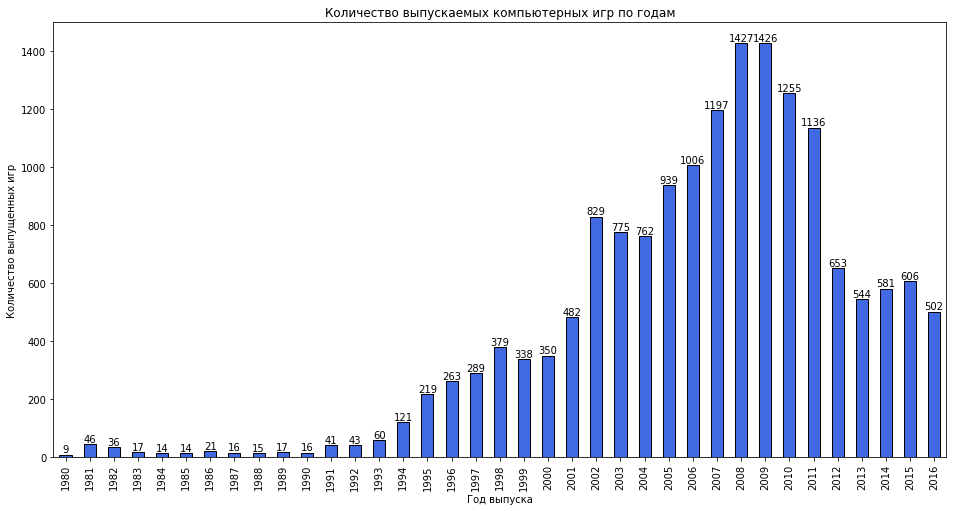

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))

release_counts = data['year_of_release'].value_counts().sort_index()
release_counts.plot.bar(color='royalblue', edgecolor='black')

for index, value in enumerate(release_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.title('Количество выпускаемых компьютерных игр по годам')    
plt.show()

На графике видно, что резкий всплеск в количестве выпускаемых игр произошел в 2000-х годах, а в 2012 году произошел резкий спад. Интересно, почему?

**Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами. Затем построим распределение по годам по всем платформам.** 

**Определим топ 5 платформ с наибольшими суммарными продажами.**

In [16]:
platform_sales = data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

platform_sales['total_sales'] = platform_sales.sum(axis=1)

top_platforms = platform_sales.sort_values(by='total_sales', ascending=False).head(5)

print(top_platforms)

          na_sales  eu_sales  jp_sales  other_sales  total_sales
platform                                                        
PS2         572.92    332.63    137.54       190.47      1233.56
X360        595.74    268.32     12.30        84.88       961.24
PS3         390.13    327.21     79.41       134.59       931.34
Wii         486.87    258.32     68.28        77.71       891.18
DS          380.31    188.41    175.02        59.04       802.78


**Построим график распределения продаж по платформам.**

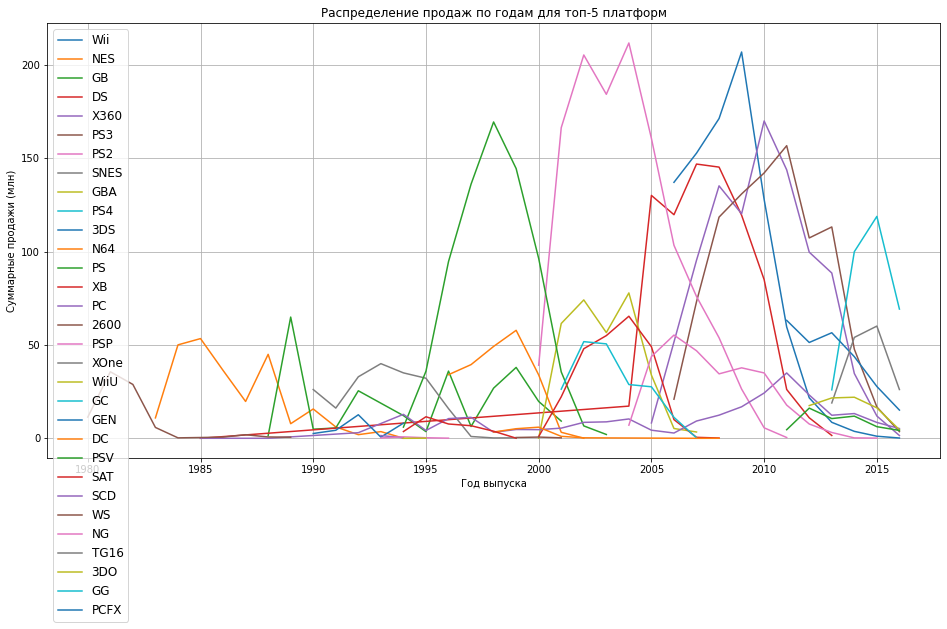

In [17]:
plt.figure(figsize=(16, 8))

for platform in data['platform'].unique():
    platform_sales_year = data[data['platform'] == platform].groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
    platform_sales_year['total_sales'] = platform_sales_year.sum(axis=1)
    platform_sales_year['total_sales'].plot(label=platform)

plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн)')
plt.title('Распределение продаж по годам для топ-5 платформ')
plt.legend(fontsize='large')
plt.grid(True)
plt.show()

Топовая платформа по продажам считается PS2: 1.233 млрд. Дата выхода консоли: 4 марта 2000 года. Это совпадает с взрывным ростом продаваемых игр под эту консоль.

Второе место занимает конкурент от Microsoft. Дата выхода консоли: 22 ноября 2005 года. Занимаемое второе место, вероятно, связано с опозданием почти на 5 лет.

Третье и четвертое место недалеко отстали от второго. PS3 и Wii уверенно дышат в спину по количеству продаваемых игр, превышая отметку около 900 млн.

Замыкает пятерку по количеству продаж платформа для Nintendo DS. На данную платформу было продано более 800 тыс. игр.

Судя по графику, количество продаваемых игр для платформы WII резко снизилось после выпуска Xbox 360. Однако общая тенденция к снижению началась после 2009 года. Предполагаем, что на это могли повлиять несколько факторов:

- Мировой финансовый кризис 2008 года, который привел к банкротству многих игровых студий.
- Появление и бурное развитие социальных платформ, таких как facebook, youtube и т.п.
- С увеличением вычислительной мощности платформ возрос и спрос на более качественные игры, что привело к увеличению времени, необходимого на их разработку. В результате процесс создания игр стал более продолжительным, среднее время разработки для проектов уровня АА и ААА увеличилось примерно на 2-4 года. Это связано с жизненным циклом платформ. Он составляет 2-6 лет. 

**Рассмотрим данные по продажам за период 2013-2016 год. Судя по графику рынок начал свое восстановление именно в этот период.**

In [18]:
actual_data = data.query('year_of_release > 2012')
actual_data['total_sales'] = actual_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16443
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            2233 non-null   int64  
 1   name             2233 non-null   object 
 2   platform         2233 non-null   object 
 3   year_of_release  2233 non-null   int64  
 4   genre            2233 non-null   object 
 5   na_sales         2233 non-null   float64
 6   eu_sales         2233 non-null   float64
 7   jp_sales         2233 non-null   float64
 8   other_sales      2233 non-null   float64
 9   critic_score     2233 non-null   float64
 10  user_score       2233 non-null   object 
 11  rating           2233 non-null   object 
 12  total_sales      2233 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 244.2+ KB


/tmp/ipykernel_300/3326852550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data['total_sales'] = actual_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


**Построим график по продажам что узнать лидеров рынка на актуальный период.**

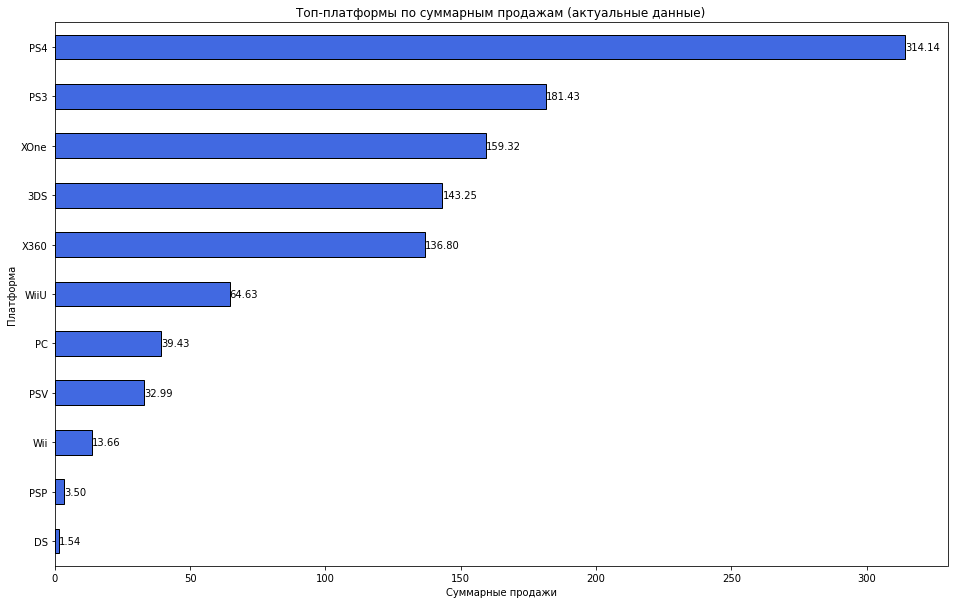

In [19]:
plt.figure(figsize=(16, 10))

top_platforms_actual = actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=True)
top_platforms_actual.plot(kind='barh', color='royalblue', edgecolor='black')

for index, value in enumerate(top_platforms_actual):
    plt.text(value, index, f"{value:.2f}", ha='left', va='center', fontsize=10)

plt.xlabel('Суммарные продажи')
plt.ylabel('Платформа')
plt.title('Топ-платформы по суммарным продажам (актуальные данные)')
plt.show()

График показывает, что наибольшие продажи среди актуальных платформ приходятся на PS4, PS3, XOne, 3DS и X360. Это свидетельствует о значительном интересе пользователей к играм, выпущенным на современных платформах.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

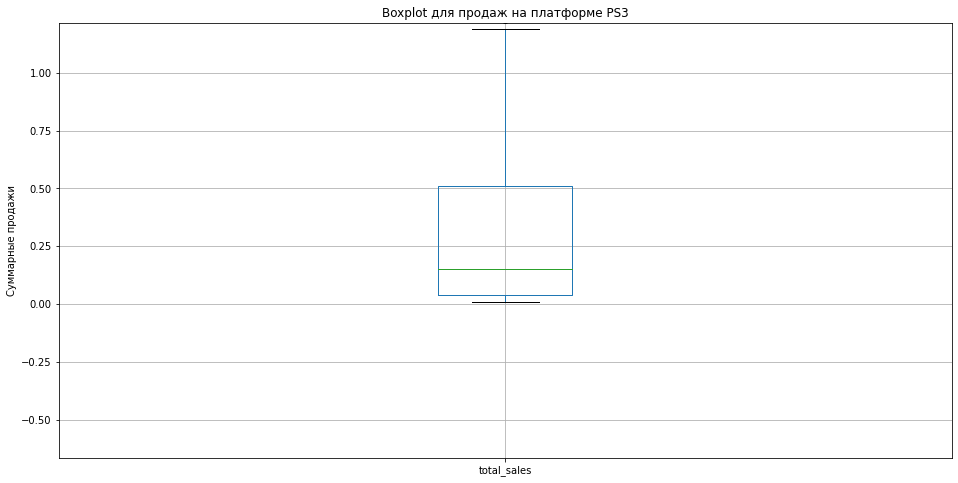

Статистика для платформы PS3:
count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64



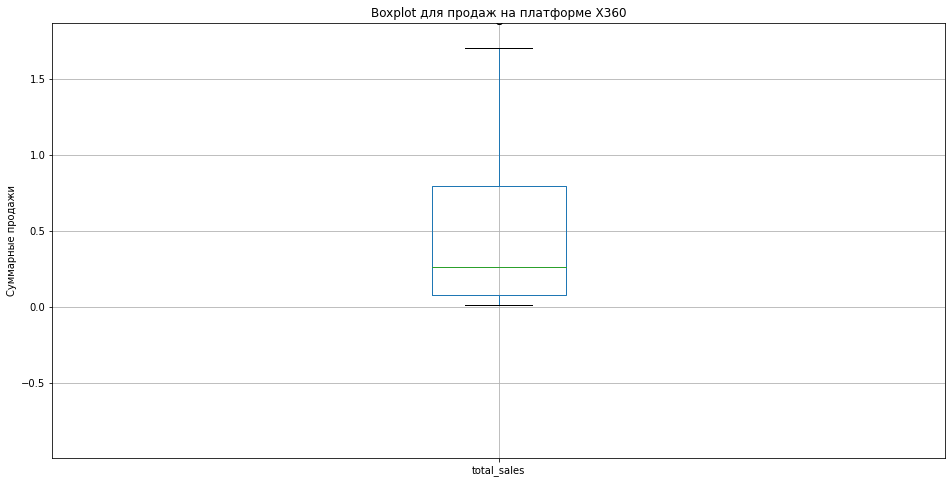

Статистика для платформы X360:
count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64



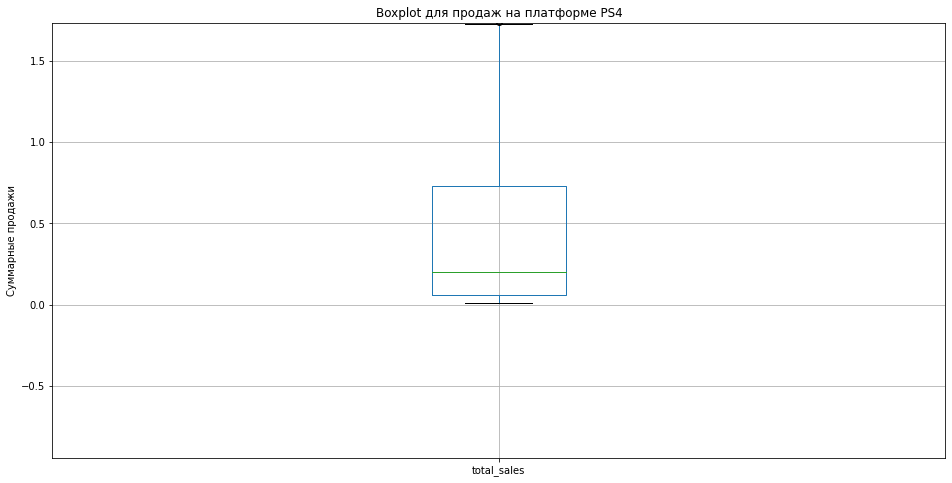

Статистика для платформы PS4:
count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64



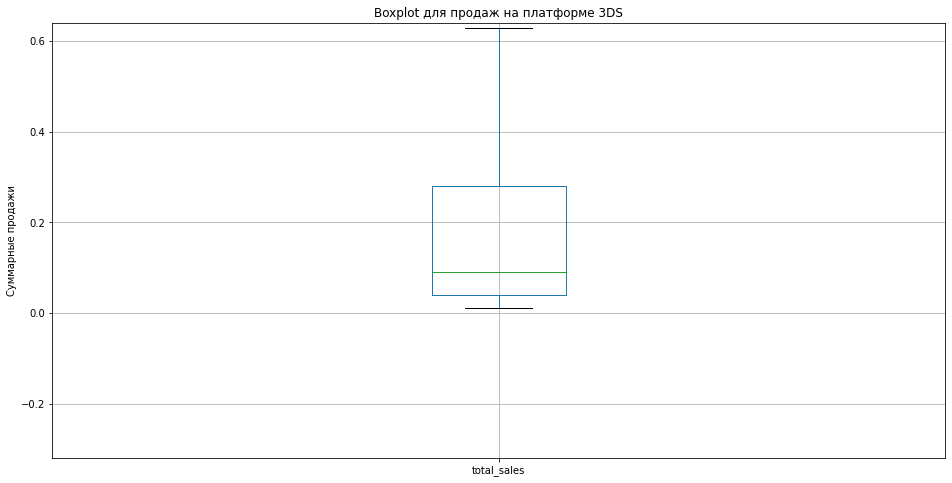

Статистика для платформы 3DS:
count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64



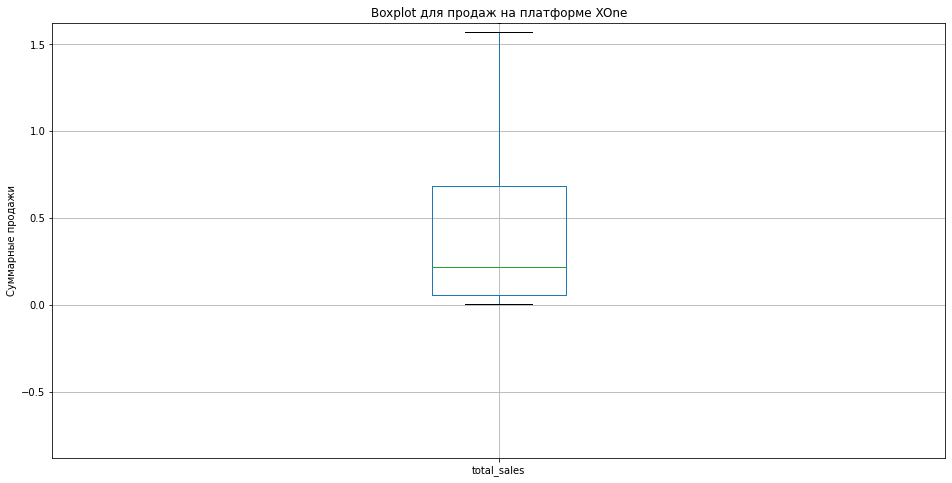

Статистика для платформы XOne:
count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64



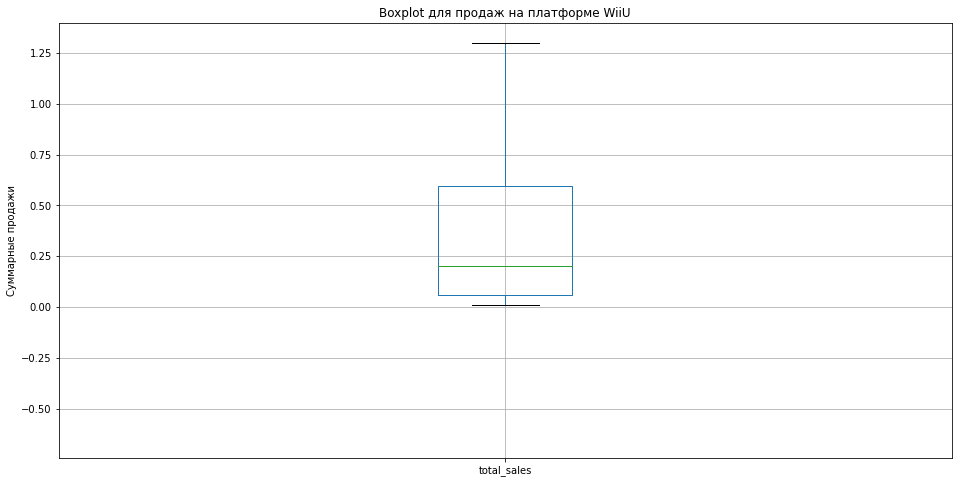

Статистика для платформы WiiU:
count    115.000000
mean       0.562000
std        1.038778
min        0.010000
25%        0.060000
50%        0.200000
75%        0.595000
max        7.090000
Name: total_sales, dtype: float64



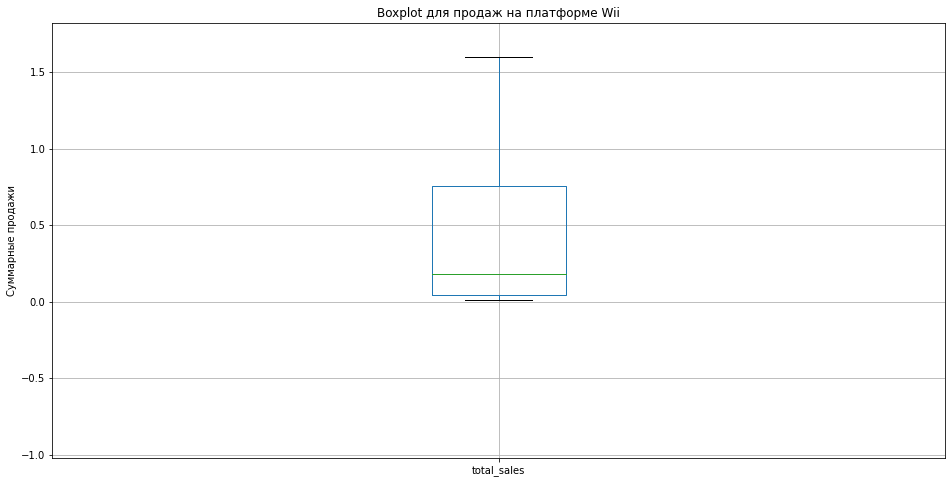

Статистика для платформы Wii:
count    23.000000
mean      0.593913
std       0.915432
min       0.010000
25%       0.045000
50%       0.180000
75%       0.755000
max       3.580000
Name: total_sales, dtype: float64



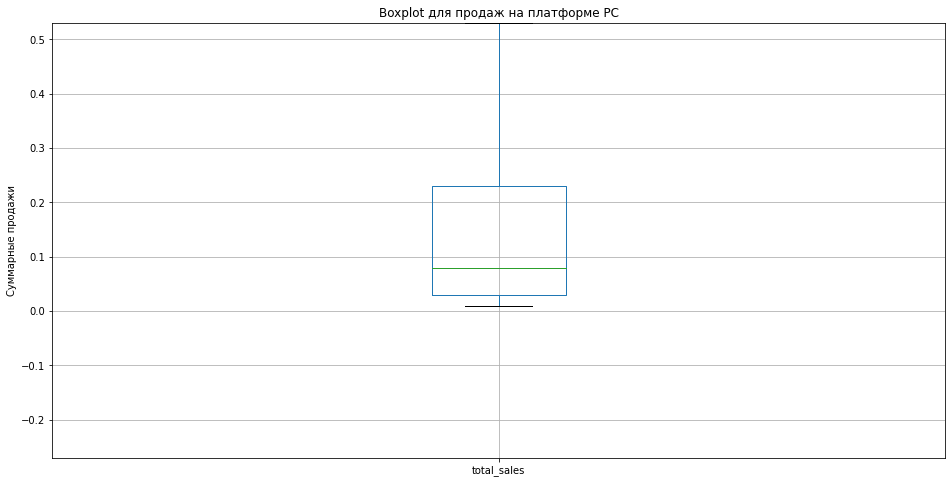

Статистика для платформы PC:
count    189.000000
mean       0.208624
std        0.352304
min        0.010000
25%        0.030000
50%        0.080000
75%        0.230000
max        3.050000
Name: total_sales, dtype: float64



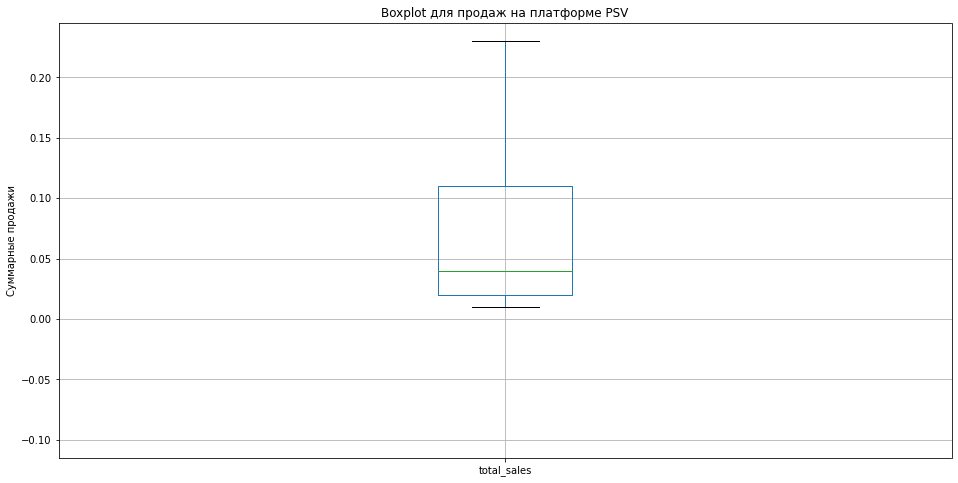

Статистика для платформы PSV:
count    358.000000
mean       0.092151
std        0.153816
min        0.010000
25%        0.020000
50%        0.040000
75%        0.110000
max        1.960000
Name: total_sales, dtype: float64



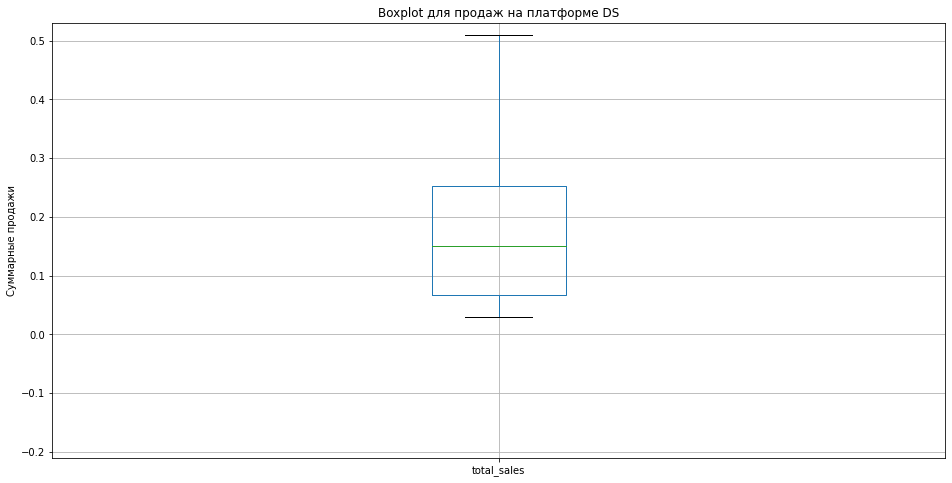

Статистика для платформы DS:
count    8.000000
mean     0.192500
std      0.172026
min      0.030000
25%      0.067500
50%      0.150000
75%      0.252500
max      0.510000
Name: total_sales, dtype: float64



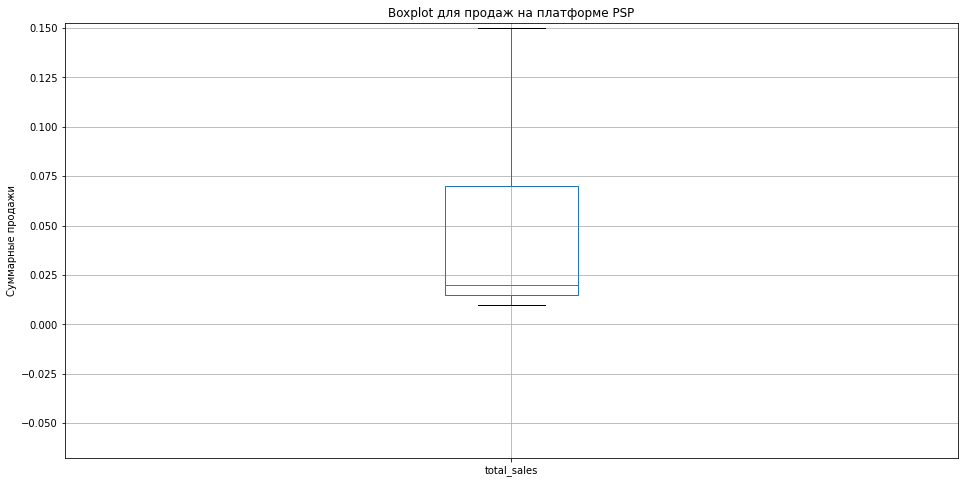

Статистика для платформы PSP:
count    67.000000
mean      0.052239
std       0.059768
min       0.010000
25%       0.015000
50%       0.020000
75%       0.070000
max       0.240000
Name: total_sales, dtype: float64



In [20]:
import seaborn as sns

for platform in actual_data['platform'].unique():
    plt.figure(figsize=(16, 8))
    actual_data.query('platform == @platform').boxplot(column = 'total_sales')
    plt.title(f'Boxplot для продаж на платформе {platform}')
    plt.ylabel('Суммарные продажи')
    
    platform_data = actual_data.query('platform == @platform')
    q25, q75 = platform_data['total_sales'].quantile([0.25, 0.75])
    ylim_min = q25 - 1.5 * (q75 - q25)
    ylim_max = q75 + 1.5 * (q75 - q25)
    
    plt.ylim(ylim_min, ylim_max)
    plt.show()
    
    platform_data = actual_data.query('platform == @platform')
    print(f"Статистика для платформы {platform}:\n{platform_data['total_sales'].describe()}\n")

**Рассмотрим значения на отдельном графике. Исключим выбросы, ограничив значения до миллиона продаж и отсортируем данные по медиане.**

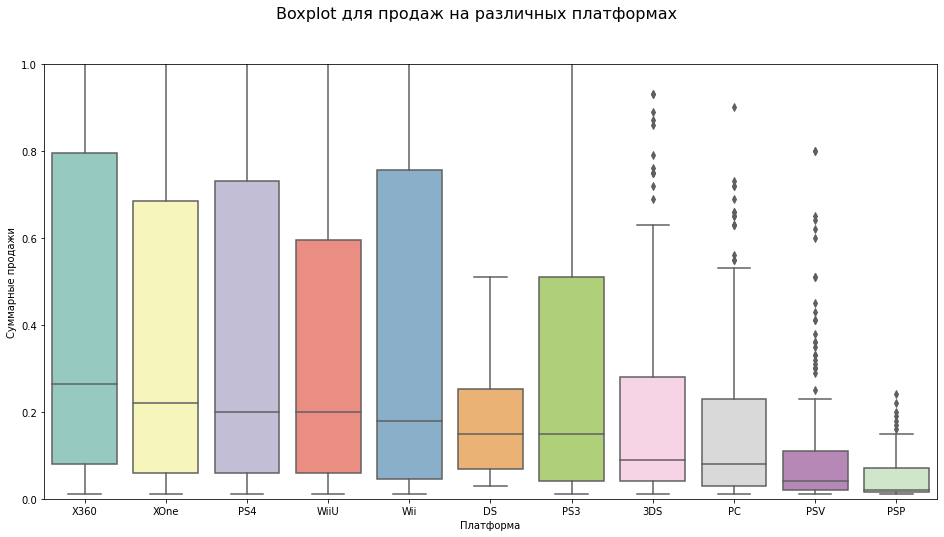

In [21]:
plt.figure(figsize=(16, 8))

median_sales_by_platform = actual_data.groupby('platform')['total_sales'].median()

sorted_data = actual_data.copy()
sorted_data['median_sales'] = sorted_data['platform'].map(median_sales_by_platform)
sorted_data = sorted_data.sort_values(by='median_sales', ascending=False)

sns.boxplot(data=sorted_data, x='platform', y='total_sales', palette='Set3')

plt.ylim(0, 1)
plt.suptitle('Boxplot для продаж на различных платформах', fontsize=16)
plt.title('')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')

plt.show()

Топ 5 самых стабильных платформ по продажам включают X360, XOne, PS4, WiiU и Wii. Средние значения продаж на этих платформах колеблются в районе 700 тысяч. PS3 немного отстает со значением около 500 тысяч. Остальные платформы собирают меньше 300 тысяч, и их популярность также ниже. Однако, PC выделяется из этой картины: эта платформа поддерживается за счет высокобюджетных проектов, собирающих огромные суммы.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Отберем данные по платформе PS4.**

In [22]:
sales_rating = actual_data[['platform','total_sales', 'critic_score', 'user_score']]
sales_rating.head()

,platform,total_sales,critic_score,user_score
16,PS3,21.05,9.7,8.2
23,X360,16.27,9.7,8.1
31,PS4,14.63,0.0,0
33,3DS,14.60,0.0,0
42,PS4,12.62,9.7,8.3


**Посчитаем корреляцию между отзывами и продажами.**

In [23]:
sales_rating.corr()

,total_sales,critic_score
total_sales,1.000000,0.221094
critic_score,0.221094,1.000000


**Построим диаграмму рассеивания для данных PS4.**

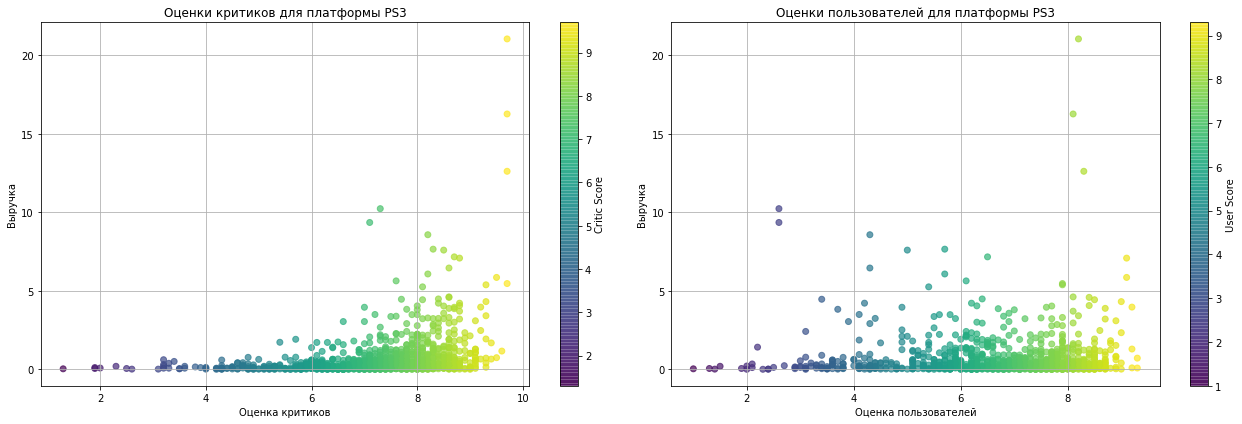

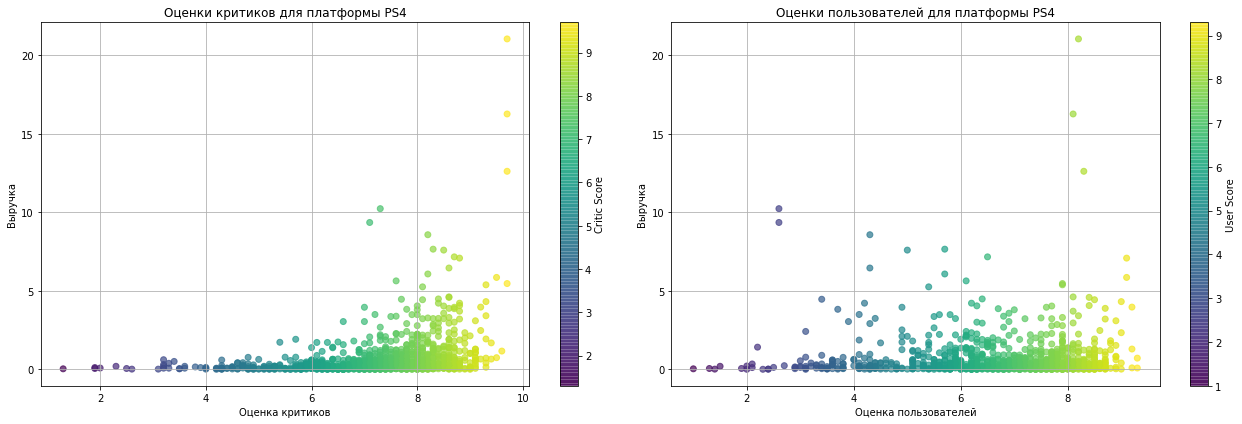

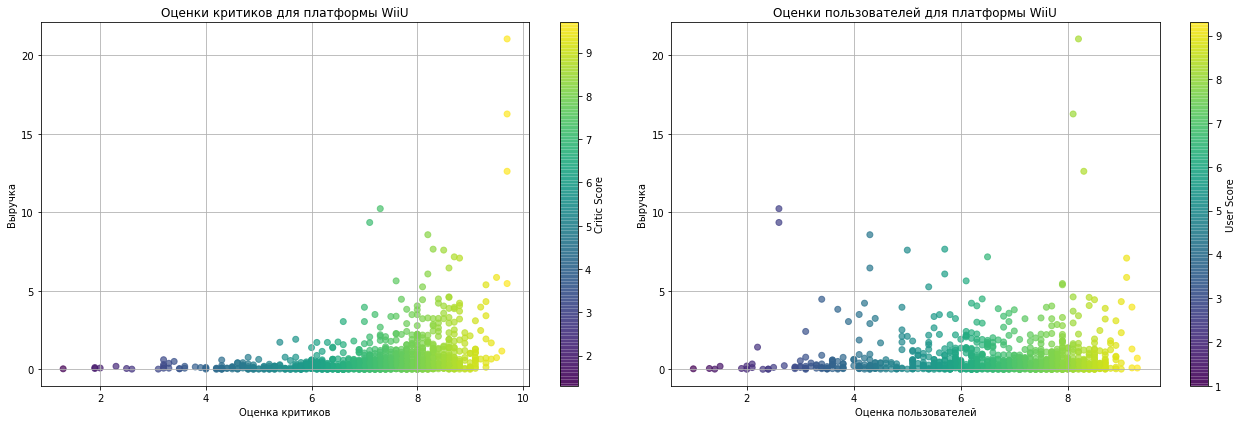

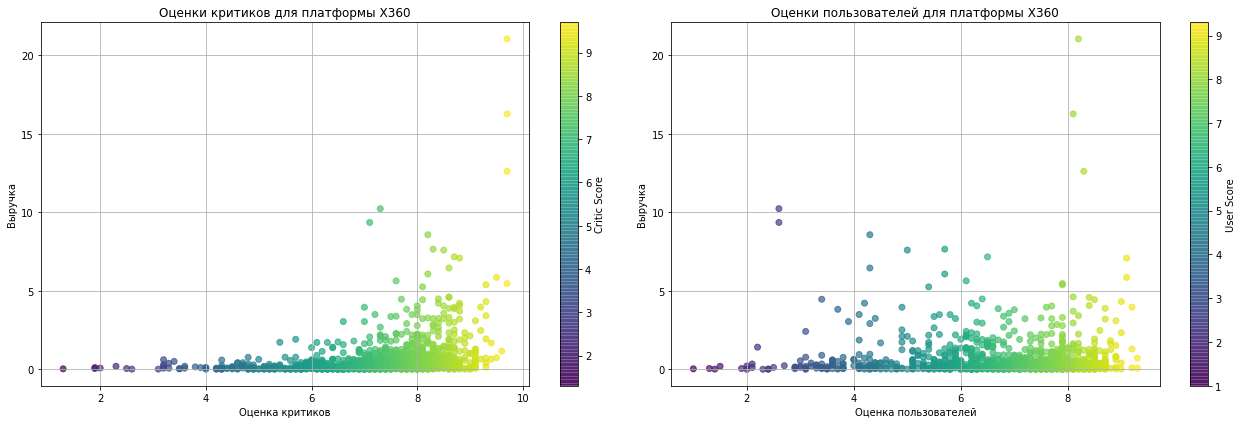

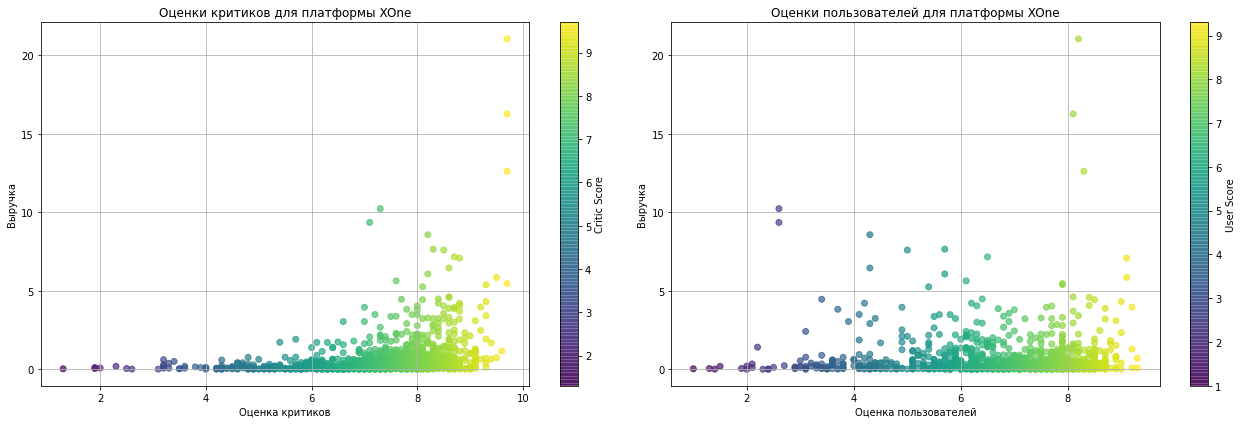

In [24]:
actual_data_copy = actual_data.copy()
actual_data_copy['user_score'] = pd.to_numeric(actual_data_copy['user_score'], errors='coerce')
actual_data_copy['critic_score'] = pd.to_numeric(actual_data_copy['critic_score'], errors='coerce')

actual_data_filtered = actual_data_copy[(actual_data_copy['user_score'] > 0) & (actual_data_copy['critic_score'] > 0)]

sales_by_platform = actual_data_filtered.groupby('platform')['total_sales'].sum()

top_platforms = sales_by_platform.sort_values(ascending=False).head(5).index

top_platform_data = actual_data_filtered[actual_data_filtered['platform'].isin(top_platforms)]

grouped_by_platform = top_platform_data.groupby('platform')

for platform, data in grouped_by_platform:
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(actual_data_filtered['critic_score'], actual_data_filtered['total_sales'], c=actual_data_filtered['critic_score'], cmap='viridis', alpha=0.7)
    plt.colorbar(label='Critic Score')
    plt.title(f'Оценки критиков для платформы {platform}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Выручка')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.scatter(actual_data_filtered['user_score'], actual_data_filtered['total_sales'], c=actual_data_filtered['user_score'], cmap='viridis', alpha=0.7)
    plt.colorbar(label='User Score')
    plt.title(f'Оценки пользователей для платформы {platform}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Выручка')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Были выбраны топ 5 платформ по объему продаж, после чего для каждой из них были построены диаграммы рассеивания. На примере платформы 3DS можно заметить, что игры с высокими оценками критиков обычно приносят больше выручки, однако игры без оценок часто имеют значительно более высокие продажи. Для платформ PS и PS4 наблюдается тенденция, что игры с высокими оценками критиков имеют более высокие продажи, чем те, что получили низкий рейтинг. Оценки критиков на этих платформах кажутся более авторитетными по сравнению с оценками пользователей, где даже игры с низкими и средними оценками могут иметь хорошие продажи. Подобные тенденции наблюдаются и для платформ X360 и XOne. В целом, оценки критиков кажутся более информативными, в то время как оценки пользователей могут быть менее надежными для предсказания успеха игры в коммерческом плане.

**Определим топ игры с выручкой по жанрам. Построим диаграмму для наглядности.**

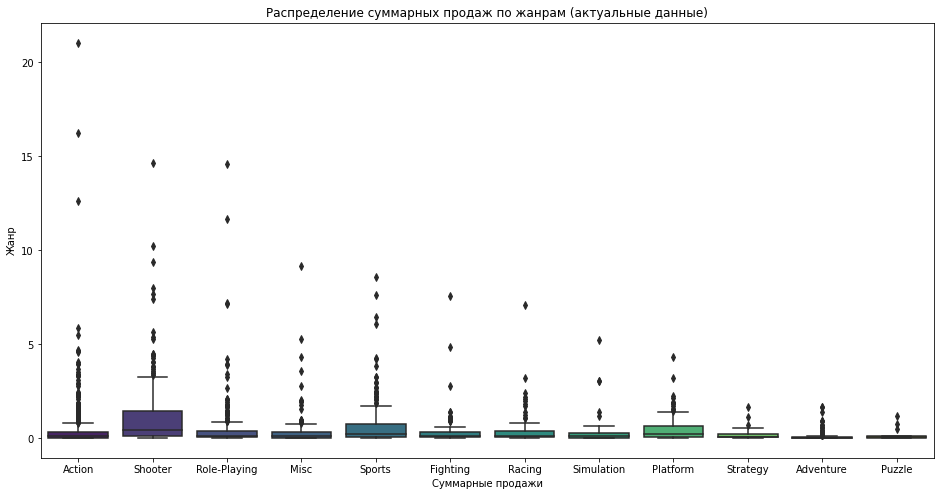

In [25]:
plt.figure(figsize=(16, 8))

sns.boxplot(x='genre', y='total_sales', data=actual_data, palette='viridis')

plt.xlabel('Суммарные продажи')
plt.ylabel('Жанр')
plt.title('Распределение суммарных продаж по жанрам (актуальные данные)')

plt.show()

Наибольшая выручка обычно приходится на игры в жанрах, которые предлагают погружение игрока в интенсивный игровой процесс, такие как Action, Shooter, Sports и Role-Playing. Однако, в этом случае большая часть выручки может быть обеспечена небольшим количеством проектов, которые собирают огромные суммы. С другой стороны, игры, требующие активного мышления, такие как стратегии или головоломки, часто имеют намного более низкую выручку.

Стабильный коммерческий успех обычно характерен для игр в жанрах Shooter, Sports и Platform. Они регулярно приносят значительные доходы. Однако создавая игры в жанре Sports и Platform, не следует рассчитывать на такой же огромный успех, как у жанра Action и Shooter. 

Общий тренд показывает, что в жанре Shooter наблюдается самый стабильный доход, и часто встречаются проекты, собирающие высокие кассовые сборы.

## Составление портретов пользователей

**Определим топ 5 самых популярных платформ для каждого региона(NA, EU, JP).**

**Для наглядной демонстрации построим стобчатые диаграммы.**

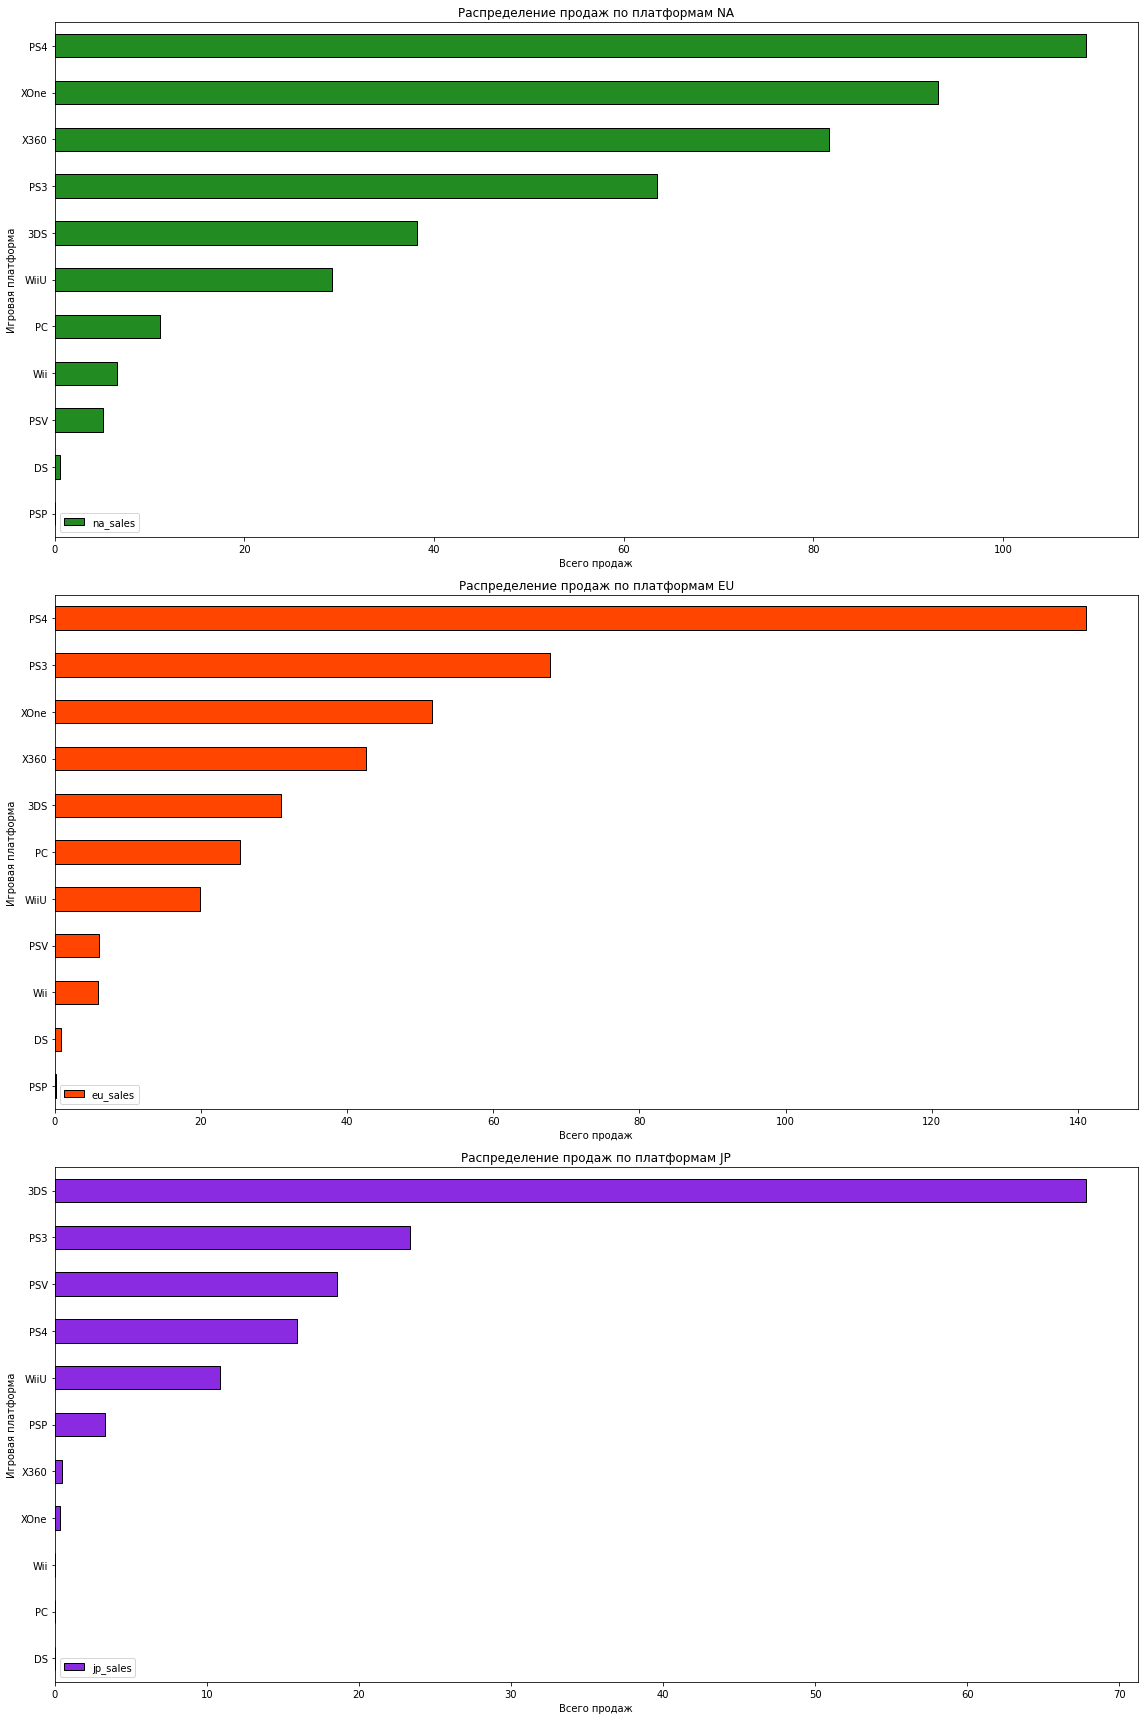

In [26]:
na_sales = actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales')

eu_sales = actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales')

jp_sales = actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')

fig, axes = plt.subplots(3, 1, figsize=(16,24))

na_sales.plot(kind='barh', color='forestgreen', edgecolor='black', ax=axes[0])
axes[0].set_title('Распределение продаж по платформам NA')
axes[0].set_xlabel('Всего продаж')
axes[0].set_ylabel('Игровая платформа')

eu_sales.plot(kind='barh', color='orangered', edgecolor='black', ax=axes[1])
axes[1].set_title('Распределение продаж по платформам EU')
axes[1].set_xlabel('Всего продаж')
axes[1].set_ylabel('Игровая платформа')

jp_sales.plot(kind='barh', color='blueviolet', edgecolor='black', ax=axes[2])
axes[2].set_title('Распределение продаж по платформам JP')
axes[2].set_xlabel('Всего продаж')
axes[2].set_ylabel('Игровая платформа')

plt.tight_layout()
plt.show()

Продажи в регионе NA (North America):

- PS4 занимает первое место по продажам, что соответствует ожиданиям, учитывая его популярность в этом регионе.
- Xbox и Xbox 360 занимают следующие позиции после PS4. Это также логично, учитывая сильное присутствие Microsoft и их консолей на рынке Северной Америки.
- Wii и PS3 также имеют заметные продажи, но они находятся ниже, чем у PS4 и Xbox.

Продажи в регионе EU (Europe):

- PS4 также лидирует по продажам, подтверждая свою популярность в Европе.
- PS3 занимает второе место, что интересно, учитывая, что она старшая модель, чем PS4. Это может быть связано с тем, что PS3 имела более длительный жизненный цикл и широкий выбор игр.
- Xbox и Xbox 360 имеют более низкие продажи по сравнению с PS4 и PS3 в Европе.
- Wii имеет существенно меньшие продажи по сравнению с PlayStation и Xbox.

Продажи в регионе JP (Japan):

- Здесь сценарий значительно отличается. PS4 занимает только четвёртое место, что несколько неожиданно, учитывая успех консоли в других регионах.
- Вместо этого популярностью пользуются Nintendo 3DS и PS3, занимающие первое и второе место соответственно.
- Также стоит отметить, что DS и PS2 также имеют заметные продажи, что может свидетельствовать о предпочтениях японского рынка к старым, но надёжным и популярным платформам.

Итак, в соответствии с этим анализом, можно сделать вывод, что предпочтения потребителей в разных регионах сильно различаются, и это важно учитывать при планировании маркетинговых стратегий и выпуске игр для конкретного рынка.

**Определим топ 5 самых популярных жанров для каждого региона(NA, EU, JP).**

**Аналогично для наглядной демонстрации построим стобчатые диаграммы.**

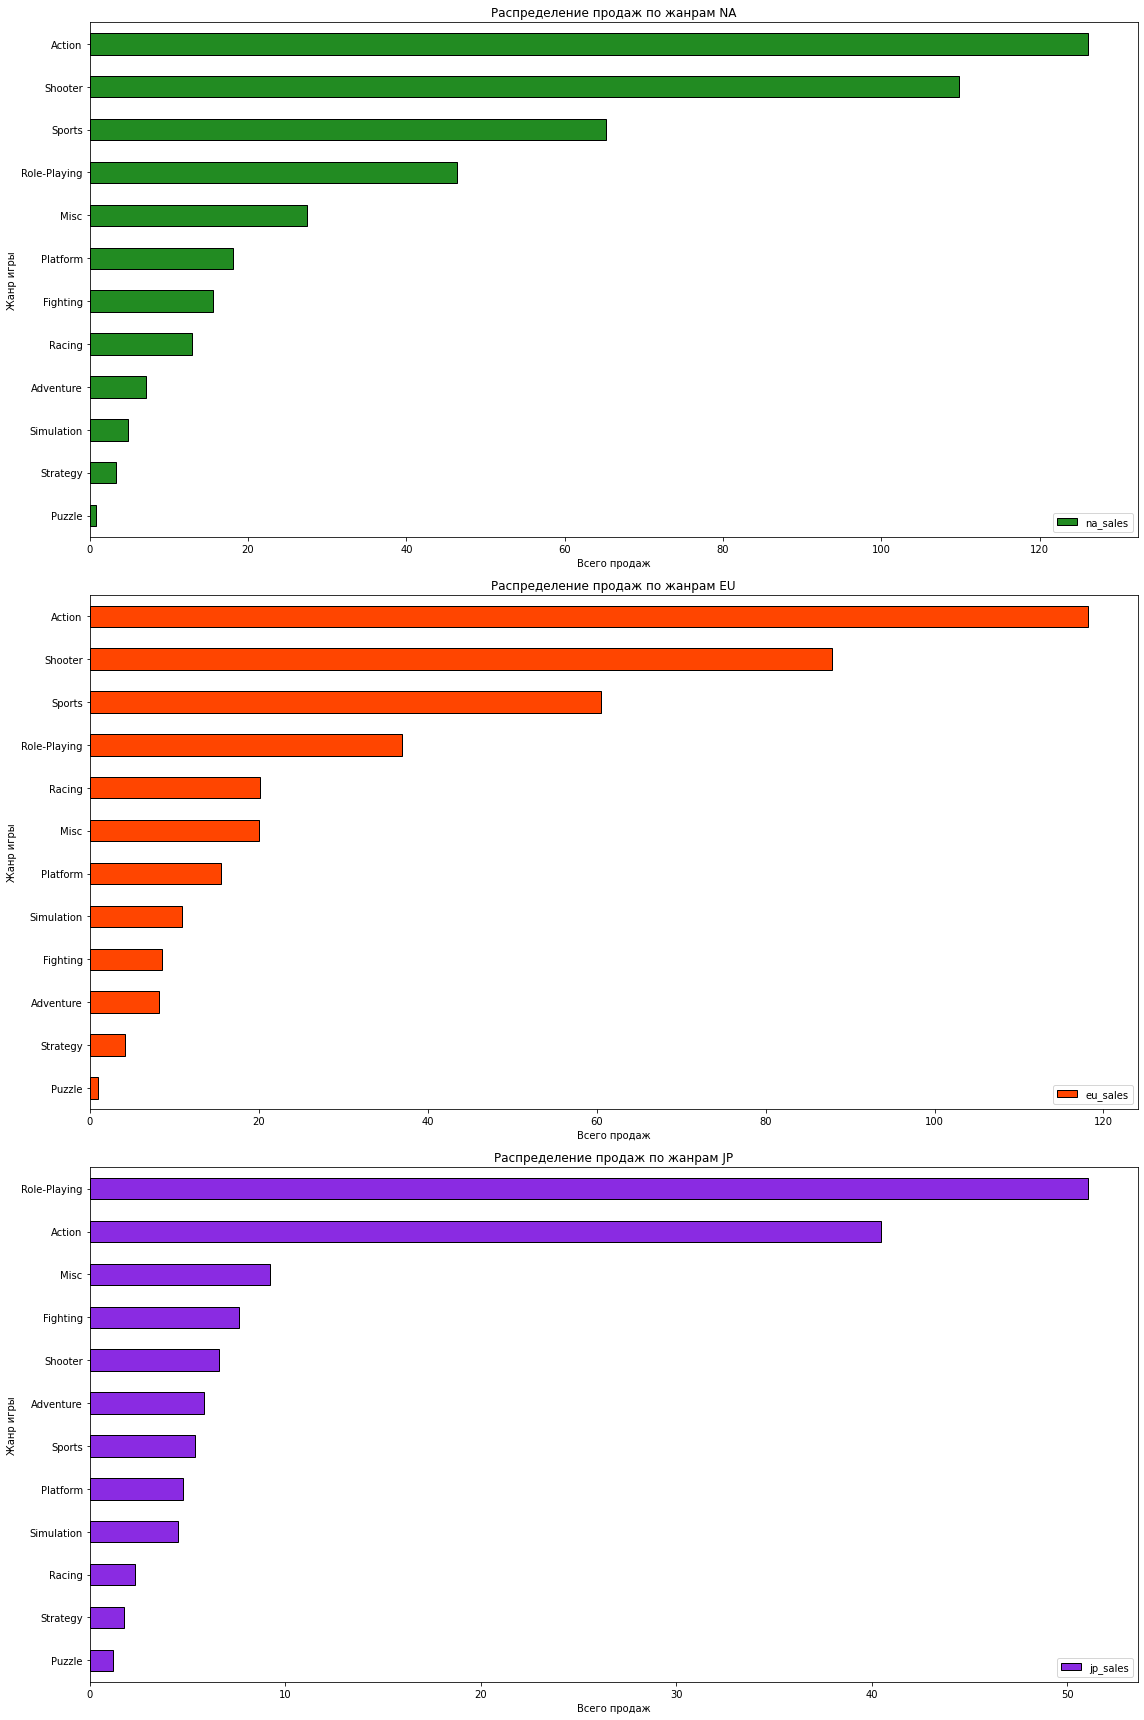

In [27]:
na_genres = actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales')

eu_genres = actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales')

jp_genres = actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')

fig, axes = plt.subplots(3, 1, figsize=(16,24))

na_genres.plot(kind='barh', color='forestgreen', edgecolor='black', ax=axes[0])
axes[0].set_title('Распределение продаж по жанрам NA')
axes[0].set_xlabel('Всего продаж')
axes[0].set_ylabel('Жанр игры')

eu_genres.plot(kind='barh', color='orangered', edgecolor='black', ax=axes[1])
axes[1].set_title('Распределение продаж по жанрам EU')
axes[1].set_xlabel('Всего продаж')
axes[1].set_ylabel('Жанр игры')

jp_genres.plot(kind='barh', color='blueviolet', edgecolor='black', ax=axes[2])
axes[2].set_title('Распределение продаж по жанрам JP')
axes[2].set_xlabel('Всего продаж')
axes[2].set_ylabel('Жанр игры')

plt.tight_layout()
plt.show()

Продажи в регионе NA (North America):

- Распределение по жанрам игр в Северной Америке и Европе практически идентичны. Популярными жанрами являются Action, Shooter и Sports.
- Это может быть связано с схожими предпочтениями игроков в этих регионах, а также с сильным влиянием американской и европейской культур на игровую индустрию.

Продажи в регионе EU (Europe):

- Ситуация в Европе аналогична Северной Америке, с популярностью жанров Action, Shooter и Sports.

Продажи в регионе JP (Japan):

- В Японии существенно отличается предпочтение жанров. Жанры Role-Playing и Action занимают значительную долю рынка.
Это может быть обусловлено культурными особенностями Японии, где RPG и Action игры обладают большей популярностью среди игроков. 
- Японские игроки, вероятно, предпочитают игры с глубоким сюжетом, хорошо разработанными персонажами и интересным игровым процессом, что часто встречается в RPG и Action играх.

Таким образом, анализируя диаграммы, можно сделать вывод, что культурные особенности различных регионов существенно влияют на предпочтения в жанрах видеоигр, и это важно учитывать при планировании маркетинговых стратегий и выпуске игр для конкретного рынка.

**Проверим влияние рейтинга на каждый регион.**

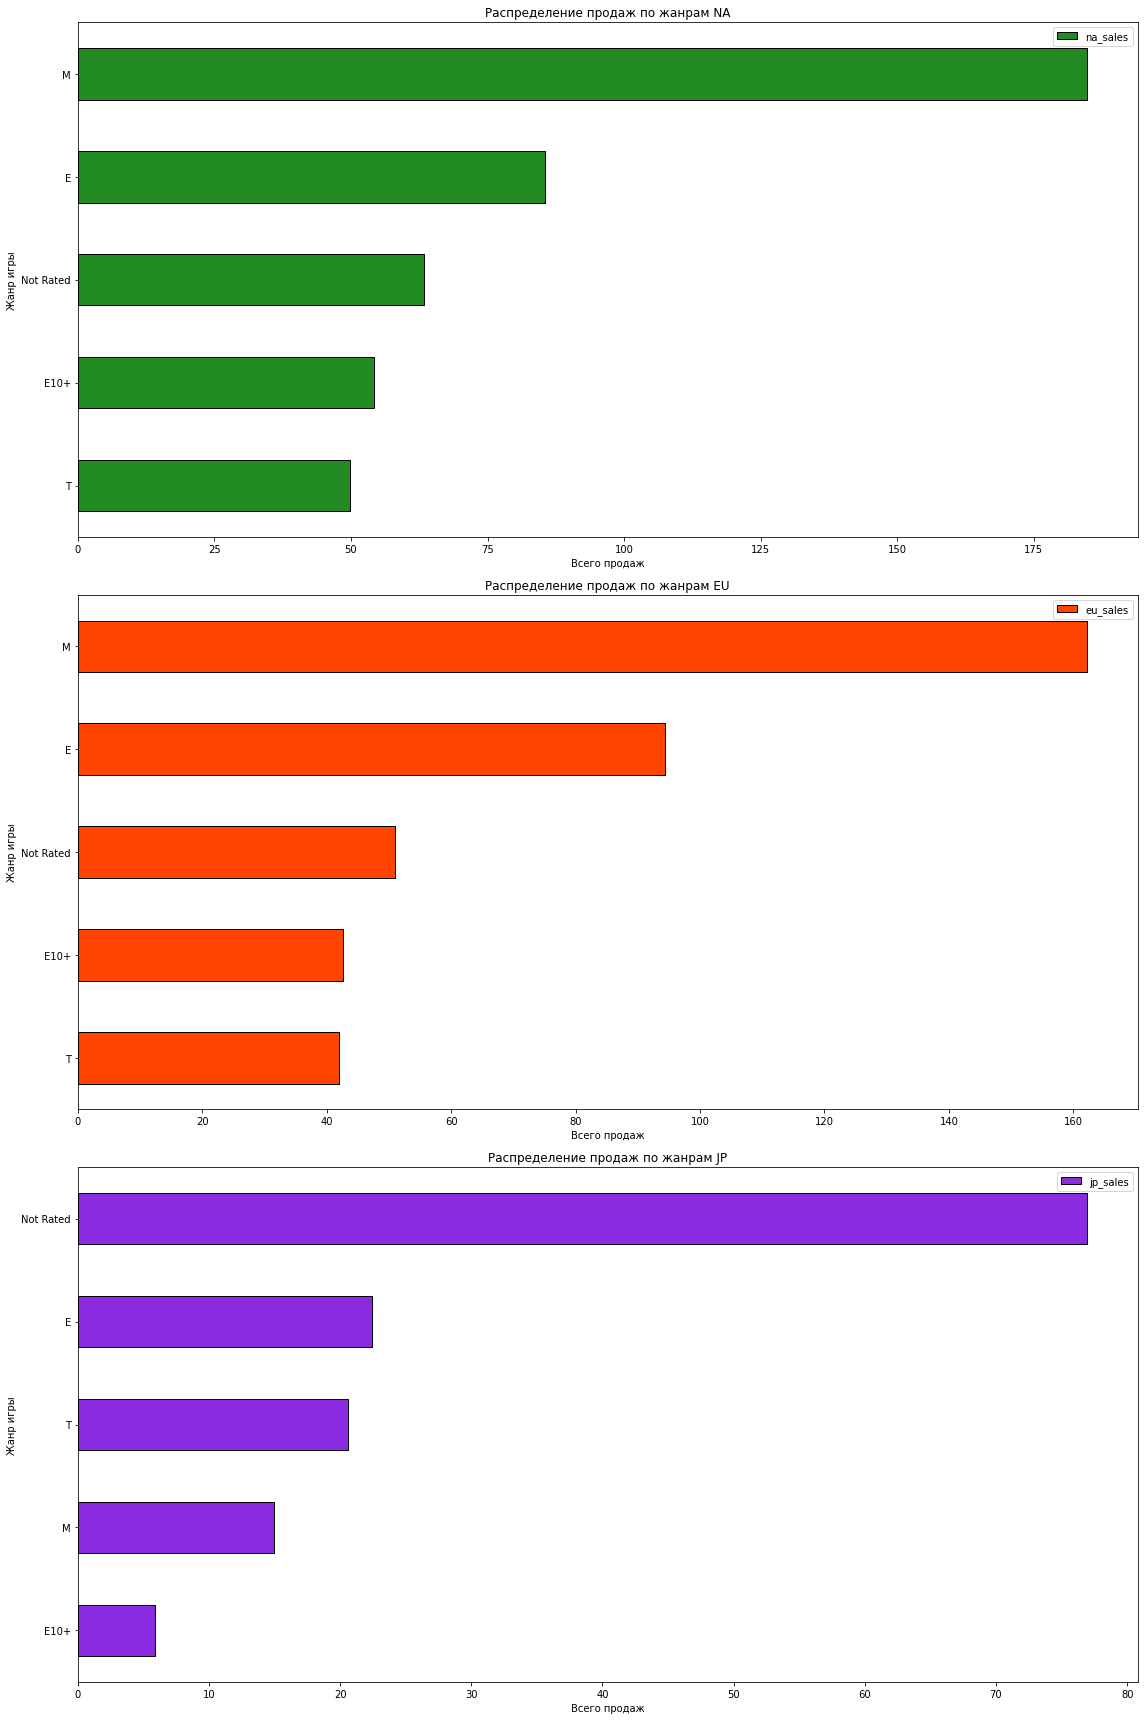

In [28]:
na_rating = actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales')

eu_rating = actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales')

jp_rating = actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')

fig, axes = plt.subplots(3, 1, figsize=(16,24))

na_rating.plot(kind='barh', color='forestgreen', edgecolor='black', ax=axes[0])
axes[0].set_title('Распределение продаж по жанрам NA')
axes[0].set_xlabel('Всего продаж')
axes[0].set_ylabel('Жанр игры')

eu_rating.plot(kind='barh', color='orangered', edgecolor='black', ax=axes[1])
axes[1].set_title('Распределение продаж по жанрам EU')
axes[1].set_xlabel('Всего продаж')
axes[1].set_ylabel('Жанр игры')

jp_rating.plot(kind='barh', color='blueviolet', edgecolor='black', ax=axes[2])
axes[2].set_title('Распределение продаж по жанрам JP')
axes[2].set_xlabel('Всего продаж')
axes[2].set_ylabel('Жанр игры')

plt.tight_layout()
plt.show()

В европейском и североамериканском регионах игровой рынок ориентирован в основном на взрослую аудиторию, где большинство выпущенных и продаваемых игр предназначено для взрослых или подростков. Системы рейтингов, такие как ESRB (в Северной Америке) и PEGI (в Европе), широко используются для классификации игр по возрастным категориям и содержанию, что позволяет родителям и игрокам принимать информированные решения о покупке.

В отличие от этого, в Японии обилие продаж игр без рейтинга относится к особенностям данного рынка. Японская игровая культура имеет свои собственные традиции и предпочтения, часто отличающиеся от западных. Хотя и существует система рейтингования CERO (Computer Entertainment Rating Organization), она не так широко распространена и не так строго применяется, особенно к играм с небольшим бюджетом или тем, что ориентированы на молодежную аудиторию. Таким образом, многочисленные продажи игр без рейтинга в Японии связаны с особенностями местного рынка и культурными предпочтениями.

## Проверка гипотез

**Проверим двустороннюю гипотезу о том, что пользовательские рейтинги платформ Xbox One и PC одинаковые.<br> Для этого воспользуемся библиотекой `scipy`. Сформулируем гипотезу:**

- H0 : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- H1 : Средние пользовательские рейтинги платформ Xbox One и PC разные.

Это гипотеза о равенстве среднего значения двух генеральных совокупностей. Для анализа нам понадобится двухвыборочный t-тест для независимых выборок. Подходит тест `st.ttest_ind()`. Параметр `alpha` установим `0.05`.


In [29]:
from scipy import stats as st

alpha = 0.05

xone_user_score = actual_data_filtered[actual_data_filtered['platform'] == 'XOne']['user_score']
pc_user_score = actual_data_filtered[actual_data_filtered['platform'] == 'PC']['user_score']

results = st.ttest_ind(xone_user_score, pc_user_score)

xone_user_score_mean = xone_user_score.mean() 
pc_user_score_mean = pc_user_score.mean() 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

print('Среднее значение пользовательских рейтингов платформы Xbox One:', xone_user_score_mean)
print('Среднее значение пользовательских рейтингов ПК бояр: ', pc_user_score_mean)

p-значение: 0.17306926618147322
Не получилось отвергнуть нулевую гипотезу
Среднее значение пользовательских рейтингов платформы Xbox One: 6.538181818181818
Среднее значение пользовательских рейтингов ПК бояр:  6.3020270270270276


Таким образом, мы не отвергаем нулевую гипотезу о том, что среднее значение пользовательских рейтингов платформы Xbox One равно значениям пользовательских рейтингов PC в пользу альтернативной гипотезы о том, что они разное.

Простыми словами: среднее значение пользовательских оценок вышеуказанных платформ примерно одинаковое.

**Проверим двустороннюю гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.<br> Для этого воспользуемся библиотекой `scipy`. Сформулируем гипотезу:**

- H0 : Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- H1 : Средние пользовательские рейтинги жанров Action и Sports разные.

Это гипотеза о равенстве среднего значения двух генеральных совокупностей. Для анализа нам понадобится двухвыборочный t-тест для независимых выборок. Подходит тест `st.ttest_ind()`. Параметр `alpha` установим `0.05`.

In [30]:
alpha = 0.05

action_user_score = actual_data_filtered[actual_data_filtered['genre'] == 'Action']['user_score']
spots_user_score = actual_data_filtered[actual_data_filtered['genre'] == 'Sports']['user_score']

results = st.ttest_ind(action_user_score, spots_user_score)

action_user_score_mean = xone_user_score.mean() 
spots_user_score_mean = spots_user_score.mean() 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

print('Среднее значение пользовательских рейтингов жанра Action:', action_user_score_mean)
print('Среднее значение пользовательских рейтингов жанра Sports: ', spots_user_score_mean)

p-значение: 1.684099430689953e-16
Отвергаем нулевую гипотезу
Среднее значение пользовательских рейтингов жанра Action: 6.538181818181818
Среднее значение пользовательских рейтингов жанра Sports:  5.665454545454545


Таким образом, мы  отвергаем нулевую гипотезу о том, что среднее значение пользовательских рейтингов жанра Action равно значениям пользовательских рейтингов жанра Sports в пользу альтернативной гипотезы о том, что они разное.

Простыми словами: среднее значение пользовательских оценок по вышеуказанным жанрам разные.

## Общий вывод по проекту

Анализ данных проведён на выборке, включающей 16 713 игровых продаж. Были рассмотрены данные за весь временной промежуток, начиная с 1980 года, и выявлен актуальный период, на который мы можем ориентироваться при планировании продаж на 2017 год – это период с 2013 по 2016 годы. В ходе анализа были удалены лишние строки, удалены дубликаты, скорректированы метаданные и данные исходной таблицы. Также были заполнены пропуски.

На графиках видно, что игровые платформы начали бурно развиваться в 2000-х, и каждый новый виток роста связан с выходом новой консоли. Больше всего выручки приносят консоли. На европейском и североамериканском рынках популярны домашние консоли, в отличие от Японии, где популярны портативные. Резкий спад продаж после 2008 года вероятно связан с мировым финансовым кризисом 2008 года, который привёл к банкротству многих игровых студий. Появление и бурное развитие социальных платформ, таких как Facebook, YouTube и т.п., также оказали значительное влияние на индустрию.

С увеличением вычислительной мощности платформ возрос и спрос на более качественные игры, что привело к увеличению времени, необходимого на их разработку. В результате процесс создания игр стал более продолжительным, среднее время разработки для проектов уровня АА и ААА увеличилось примерно на 2-4 года.

Предпочтения потребителей сильно различаются в разных регионах, что подчеркивает важность учета культурных особенностей при планировании маркетинговых стратегий и выпуске игр для конкретного рынка.
Рынок в Северной Америке и Европе ориентирован на взрослую аудиторию, в то время как в Японии наблюдается более широкий спектр предпочтений.
Системы рейтингования игр играют важную роль в принятии решений о покупке в Северной Америке и Европе, в то время как в Японии предпочтения отличаются, и продажи игр без рейтинга несут свою специфику.